In [118]:
#author:fkw
#utf-8
#creat time:2021/12/19 19：15
#bagging:random forest&&boosting:Adaboost
#dataset=iris
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from  sklearn.model_selection import GridSearchCV
#load the dataset
iris = datasets.load_iris()
# 特征值
diris = iris.data
# 标签
tiris = iris.target
labels = ['setosa', 'versicolor', 'virginica']

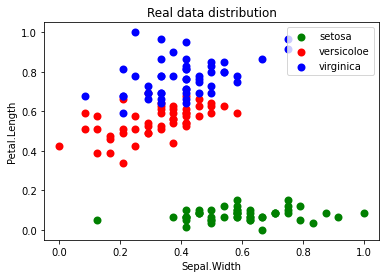

In [99]:
"""数据可视化"""
# 数组归一化 x=(x-min)/(max-min)
for i in range(4):
    diris[:, i] = (diris[:, i]-np.min(diris[:, i]))/(np.max(diris[:, i])-np.min(diris[:, i]))
#绘制dataset散点图,选取2,3列作为Xlable,ylabel
x_axis=diris[:,1]
y_axis=diris[:,2]
plt.scatter(x_axis[tiris==0],y_axis[tiris==0],c='green',marker='.',linewidths=5)
plt.scatter(x_axis[tiris==1],y_axis[tiris==1],c='red',marker='.',linewidths=5)
plt.scatter(x_axis[tiris==2],y_axis[tiris==2],c='blue',marker='.',linewidths=5)
plt.legend(["setosa","versicoloe","virginica"], loc ='upper right')
plt.title("Real data distribution")
plt.xlabel('Sepal.Width')
plt.ylabel('Petal.Length')
plt.show()

In [186]:
'''划分训练集和测试集'''
# 样本总数
num = diris.shape[0]
# 划分数据集 train/test=7:3 
ratio = 7/3 
# 测试集样本数目
num_test = int(num/(1+ratio))
# 训练集样本数目 
num_train = num-num_test 
# 产生样本标号并打乱
index = np.arange(num)
np.random.shuffle(index) 
#前30%做测试集
diris_test = diris[index[:num_test],:]
tiris_test = tiris[index[:num_test]]
#剩余的做训练集
diris_train = diris[index[num_test:],:]
tiris_train = tiris[index[num_test:]]

In [159]:
# RandomForest
#调参
clf = RandomForestClassifier()
parameters = {'n_estimators': range(30,100,10),'max_depth':range(3,10,2),
              'min_samples_leaf':[5,6,7],'max_features':[1,2,3]}
grid_clf = GridSearchCV(clf,parameters,scoring='f1_macro')
grid_clf.fit(diris_train, tiris_train)
grid_clf.best_params_,grid_clf.best_score_

({'max_depth': 5,
  'max_features': 1,
  'min_samples_leaf': 7,
  'n_estimators': 50},
 0.9721606824548001)

In [175]:
#train
clf = RandomForestClassifier(max_depth=5,max_features=1,min_samples_leaf=7,n_estimators=50)
# 训练模型
clf.fit(diris_train, tiris_train)
# 评价模型
score = clf.score(diris_test, tiris_test)
print("\n模型测试集准确率为：", score)



模型测试集准确率为： 0.9777777777777777


In [176]:
# AdaBoost
#调参
clf = AdaBoostClassifier()
parameters = {'n_estimators': range(10,100,10),'learning_rate':range(1,3,1)}      
grid_clf = GridSearchCV(clf,parameters,scoring='f1_macro')      
grid_clf.fit(diris_train, tiris_train)
grid_clf.best_params_,grid_clf.best_score_

({'learning_rate': 2, 'n_estimators': 60}, 0.9531130634071812)

In [191]:
#train
clf = AdaBoostClassifier(learning_rate=2, n_estimators=60)
# 训练模型
clf.fit(diris_train, tiris_train)
# 评价模型
score = clf.score(diris_test, tiris_test)
print("\n模型测试集准确率为：", score)



模型测试集准确率为： 0.9555555555555556
